<h2>Integrantes Grupo 2</h2>
<ul>
    <li>
    Sergio Andrés Arboleda Zuluaga,,,
    </li>
    <li>
    Cristian Daniel De Jesus Ramirez Higinio
    </li>
    <li>
    Daniel Giraldo Muñoz
    </li>
    <li>
    Juan Esteban Correa Silva
    </li>
    <li>
    Mateo Arenas Montoya
    </li>
</ul>

<font size = 8 color = BLACK><b> Actividades primer entregable VA 2019-01  </b></font>


<font size = 6 color = blue><b><center> MÓDULO I </center></b></font>

<h3>Importamos las librerías</h3>

In [2]:
#1 A

import numpy as np
import cv2
import matplotlib.pyplot as plt

<h3>Módulo 1 Punto 1, literal a </h3>

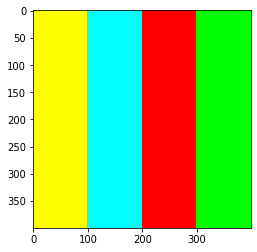

In [3]:
img_fixed = np.zeros((400,400,3), dtype=np.uint8)

for i in range (0,400):
    for j in range (0,400):
        if (j<100):
            img_fixed[i,j,0] = 255
            img_fixed[i,j,1] = 255
        elif (j<200):
            img_fixed[i,j,2] = 255
            img_fixed[i,j,1] = 255
        elif (j<300):
            img_fixed[i,j,0] = 255
        else:
            img_fixed[i,j,1] = 255
plt.imshow(img_fixed)

<p>Para crear esta imagen primero se creó una matriz en negro </p>
<p>Se separaron las bandas cada 100 pixeles con ciclos for </p>
<p>Para descubrir la combinacion colores, se usó una imagen con los colores primarios de la luz</p>


<h3>Módulo 1 Punto 1,literal b</h3>
<h3>Análisis</h3>

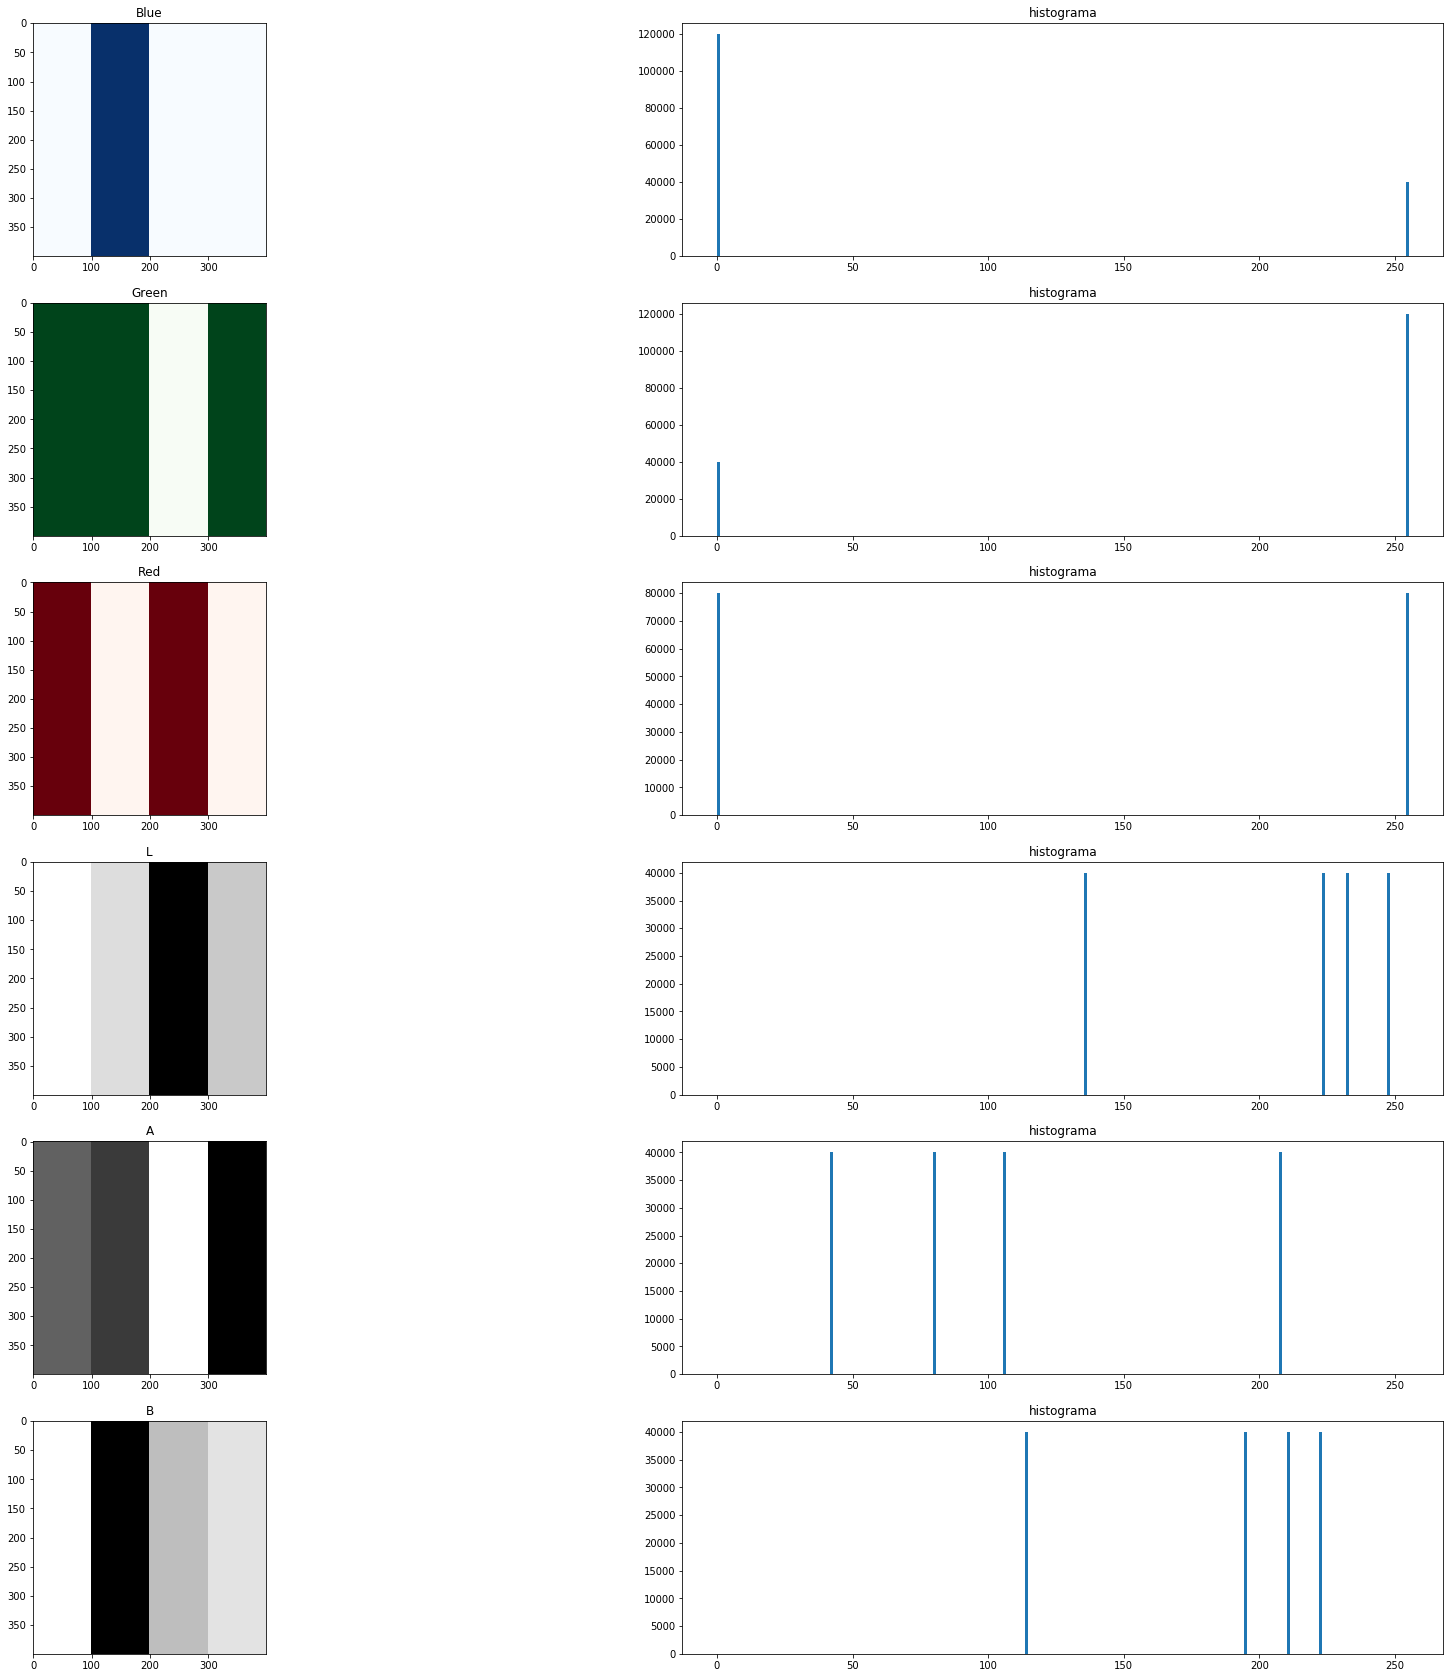

In [4]:
# 1 B

img_r = img_fixed[:,:,0]
img_g = img_fixed[:,:,1]
img_b = img_fixed[:,:,2]

img_lab = cv2.cvtColor(img_fixed, cv2.COLOR_RGB2LAB)

img_L = img_lab[:,:,0]
img_A =  img_lab[:,:,1]
img_B = img_lab[:,:,2]

fig, arreglo_plots = plt.subplots(6,2, figsize=(30, 30))

arreglo_plots[0,0].set_title('Blue')
arreglo_plots[0,0].imshow(img_b, cmap="Blues")
arreglo_plots[0,1].set_title('histograma')
_ = arreglo_plots[0,1].hist(img_b.ravel(), bins=256, range=(0.0, 255.0))

#Análogamente para los demás casos, como se observa varía la posición asociada en el subplot
arreglo_plots[1,0].set_title('Green')
arreglo_plots[1,0].imshow(img_g, cmap="Greens")
arreglo_plots[1,1].set_title('histograma')
_ = arreglo_plots[1,1].hist(img_g.ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[2,0].set_title('Red')
arreglo_plots[2,0].imshow(img_r, cmap="Reds")
arreglo_plots[2,1].set_title('histograma')
_ = arreglo_plots[2,1].hist(img_r.ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[3,0].set_title('L')
arreglo_plots[3,0].imshow(img_L, cmap="gray")
arreglo_plots[3,1].set_title('histograma')
_ = arreglo_plots[3,1].hist(img_L.ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[4,0].set_title('A')
arreglo_plots[4,0].imshow(img_A, cmap="gray")
arreglo_plots[4,1].set_title('histograma')
_ = arreglo_plots[4,1].hist(img_A.ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[5,0].set_title('B')
arreglo_plots[5,0].imshow(img_B, cmap="gray")
arreglo_plots[5,1].set_title('histograma')
_ = arreglo_plots[5,1].hist(img_B.ravel(), bins=256, range=(0.0, 255.0))

<p>En los primeros 3 histogramas detectamos las proporcionalidades de intensidad en cada canal de RGB</p>
<p>Notemos que la imagen original tiene 4 bandas de color amarillo, verde, cyan  y rojo</p>
<ul>
    <li>El color amarillo se compone de intensidades de canal verde y rojo</li>
    <li>El color cyan se compone de intensidades de canal verde y azul</li>
</ul>
Sabiendo esto podemos encontrar la relación de intensidad en cada canal respecto a toda la imagen.
<ul>
    <li>El verde se encuentra en 3 franjas</li>
    <li>El rojo en 2 franjas</li>
    <li>El azul en 1 franja</li>
</ul>    
Es por esto que se ven los resultados en los histogramas y en las imagenes mapeadas a cada canal respectivamente.

En el formato LAB es importante destacar que para cada canal los histogramas representan 4 niveles diferentes de intensidades
y todos con la misma frecuencia, esto porque a la imagen inicial a cada franja se le aplicó el mismo nivel de intensidad

En el canal L las intensidades representadas en el histograma nos permiten concluir que los colores en las franjas se logran con una intensidad entre 200-250 a excepción del rojo, el cuál permanece en un valor próximo al 50%.

En el canal A (el cual va de verde a rojo) la franja con mayor intensidad es la roja siendo así la de menor intensidad la verde, en el histograma se puede ver que las intensidades están un poco más distanciadas entre sí, las frecuencias de los extremos son la verde y la roja, y las del centro son la cyan y amarillo.

En el canal B (el cual va de azul a verde) las frecuencias se concentran en valores cercanos a 200, es decir más cercanos al verde, esto tiene sentido ya que 3 de las franjas de la imagen se componen de verde, más específicamente el verde, amarillo y cyan y por ultimo la frecuencia del rojo con intensidad cercana a 100


## c)

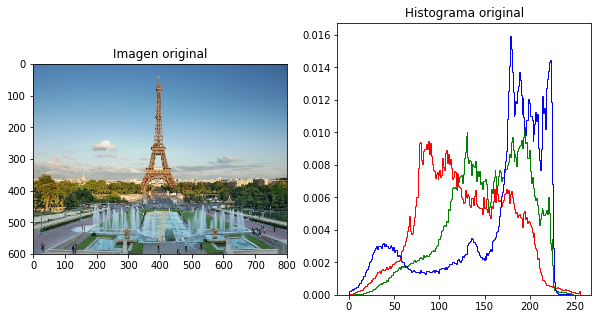

In [7]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img1 = cv2.cvtColor(cv2.imread('res/eiffel.jpg'), cv2.COLOR_BGR2RGB)

resized = cv2.resize(img1, (800,600), interpolation = cv2.INTER_AREA) # cambiar a la dimensión correcta

fig, arreglo_plots = plt.subplots(1,2, figsize=(10,5))
colors = ('r','g','b')

#Se dan títulos y se muestra el histograma
arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(resized, cmap="gray")
arreglo_plots[1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = resized[:,:,i].ravel()
    arreglo_plots[1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

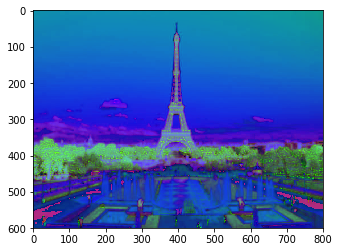

In [8]:
img_HSV = cv2.cvtColor(resized, cv2.COLOR_BGR2HSV) #Cambiar al modelo HSV
plt.imshow(img_HSV)

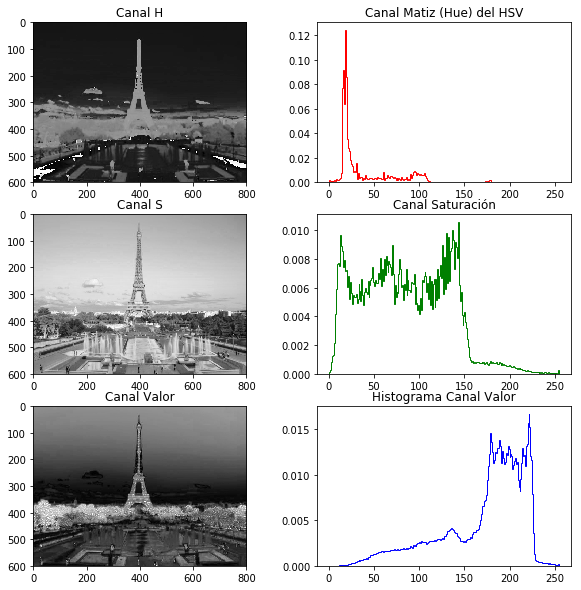

In [9]:
#Descomposición en varios canales del espacio de color HSV y sus respectivos histogramas
img_H = img_HSV[:,:,0]
img_S = img_HSV[:,:,1]
img_V = img_HSV[:,:,2]

fig, arreglo_plots = plt.subplots(3,2, figsize=(10, 10))
colors = ('r','g','b')
#Canal LAB
arreglo_plots[0,0].set_title('Canal H')
arreglo_plots[0,0].imshow(img_H, cmap="gray")
arreglo_plots[0,1].set_title('Canal Matiz (Hue) del HSV')
img_array_i = img_HSV[:,:,0].ravel()
arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[0])

arreglo_plots[1,0].set_title('Canal S')
arreglo_plots[1,0].imshow(img_V, cmap="gray")
arreglo_plots[1,1].set_title('Canal Saturación')
img_array_i = img_HSV[:,:,1].ravel()
arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[1])
    
arreglo_plots[2,0].set_title('Canal Valor')
arreglo_plots[2,0].imshow(img_S, cmap="gray")
arreglo_plots[2,1].set_title('Histograma Canal Valor')
img_array_i = img_HSV[:,:,2].ravel()
arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[2]);

En el histograma hay mayor frecuencia del valor de 20 que es mas o menos el rango donde esta el matiz azul y se puede explicar por la gran cantidad de color azul que se ve en la imagen original dado el color del cielo por ejemplo
Podemos observar, según el histograma de la imagen del canal de saturación, que la imagen no tiene colores muy vivos. Podemos observar lo anterior, porque los valores más altos del histograma del canal de saturación están en la parte de la izquierda del histograma, en donde se encuentran los colores menos vivos.Por otra parte en el canal de valor (brillo) se puede notar que los valores son bastante altos en el histograma por lo tanto es una imagen bien iluminada

El canal que mejor podría separar el fondo es el canal del Valor pero aún asi a la altura de la base de la torre hay mucho ruido que no permite separar por completo la figura 


<h3>Módulo 1 Punto 2</h3>
<h3>Montaje</h3>

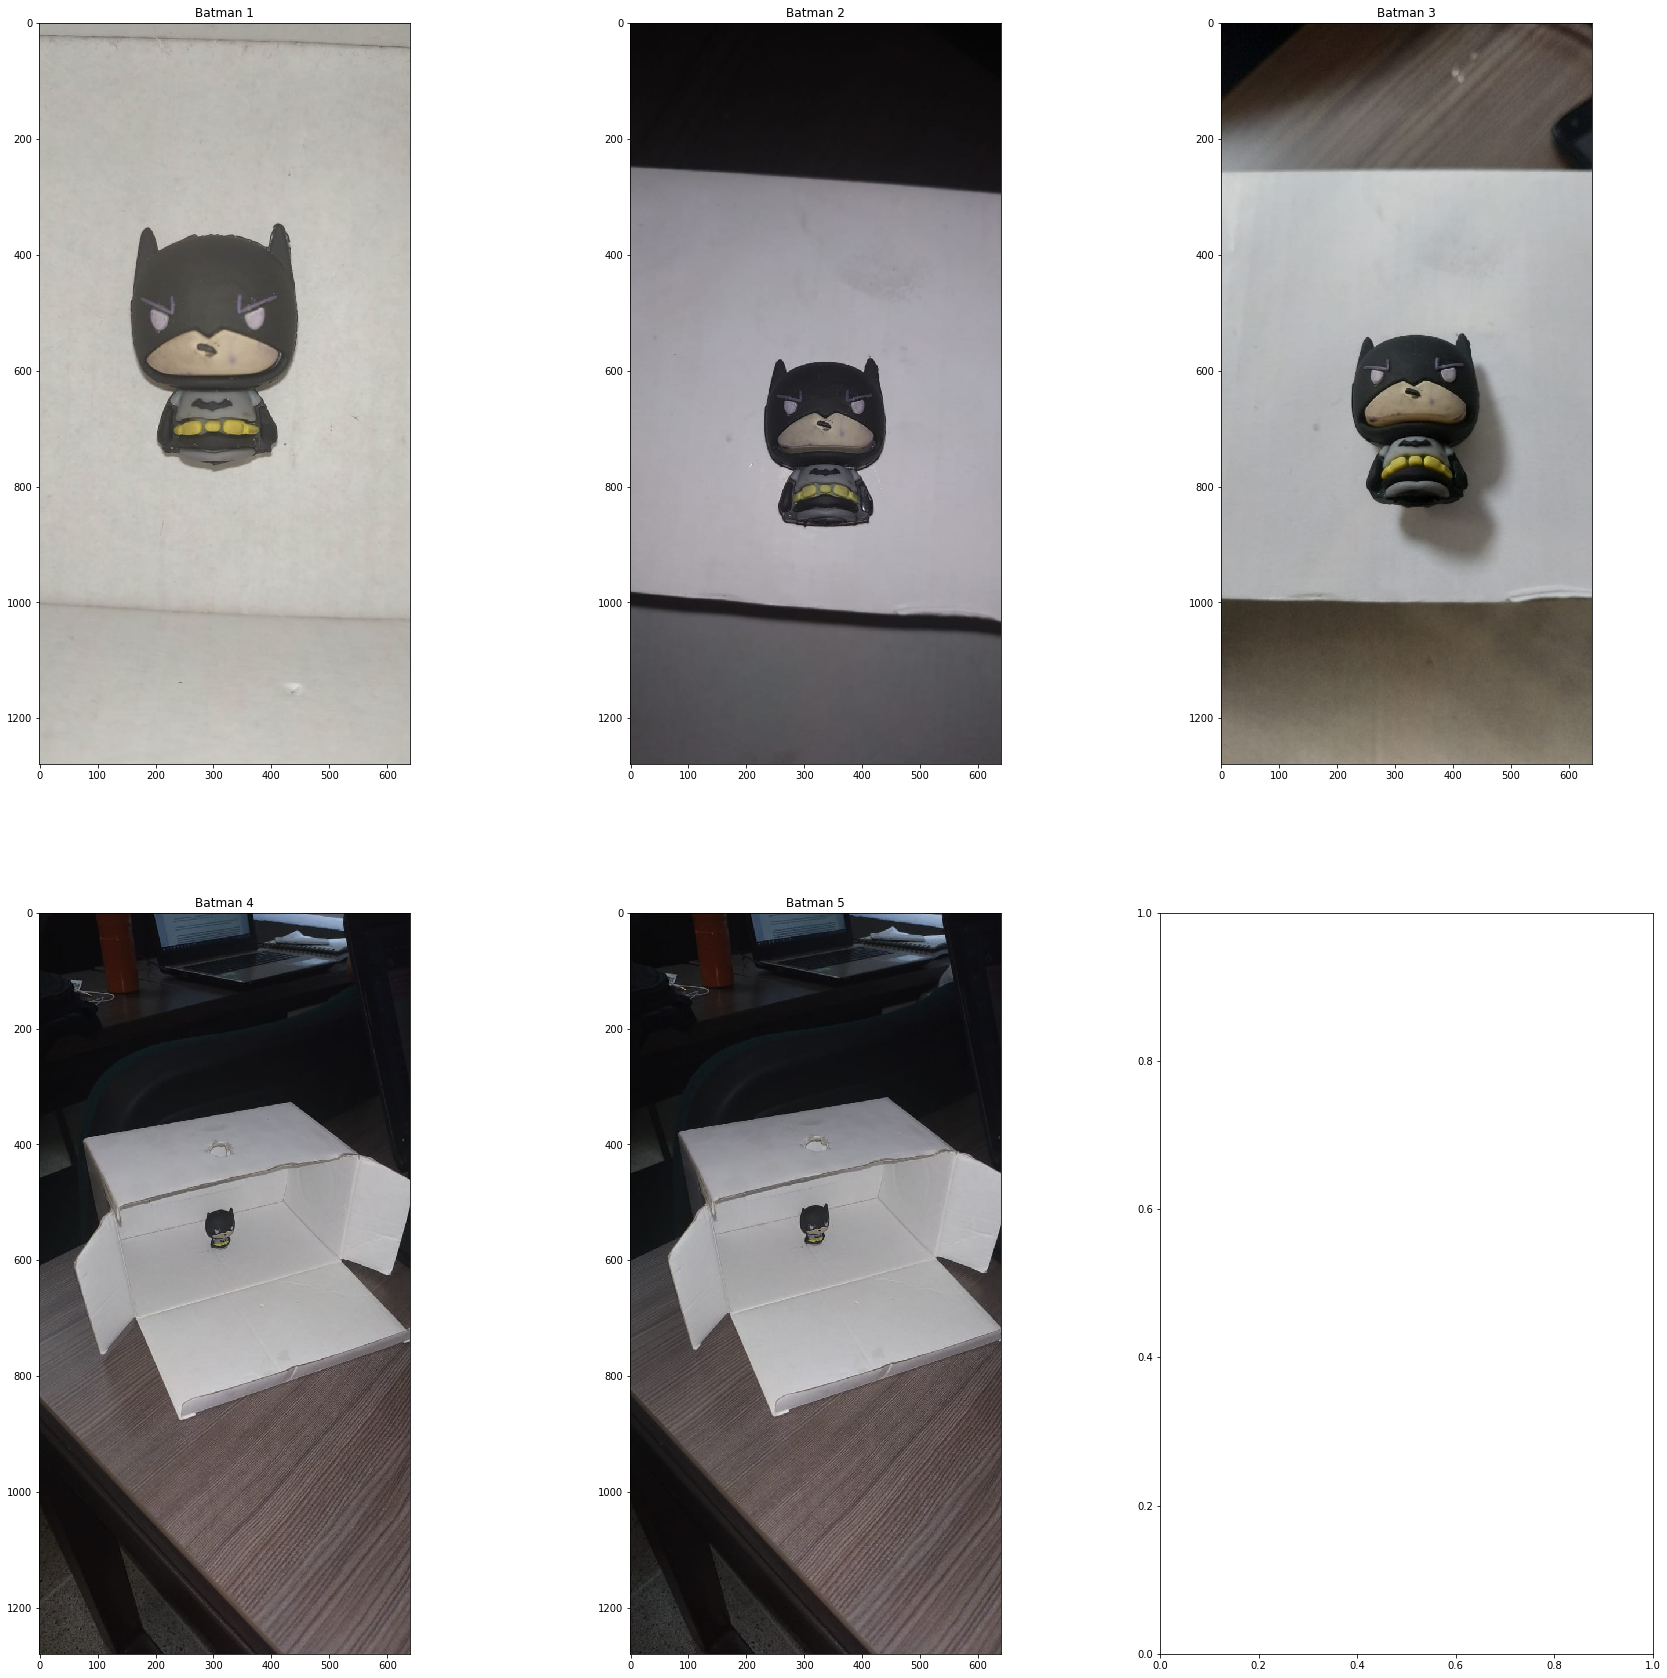

In [18]:
# 2 Montaje
img_bat1 = cv2.imread("res/bat1.jpg", cv2.IMREAD_COLOR)
img_bat1 = cv2.cvtColor(img_bat1, cv2.COLOR_BGR2RGB)

img_bat2 = cv2.imread("res/bat2.jpg", cv2.IMREAD_COLOR)
img_bat2 = cv2.cvtColor(img_bat2, cv2.COLOR_BGR2RGB)

img_bat3 = cv2.imread("res/bat3.jpg", cv2.IMREAD_COLOR)
img_bat3 = cv2.cvtColor(img_bat3, cv2.COLOR_BGR2RGB)

img_bat4 = cv2.imread("res/bat4.jpg", cv2.IMREAD_COLOR)
img_bat4 = cv2.cvtColor(img_bat4, cv2.COLOR_BGR2RGB)

img_bat5 = cv2.imread("res/bat5.jpg", cv2.IMREAD_COLOR)
img_bat5 = cv2.cvtColor(img_bat5, cv2.COLOR_BGR2RGB)


fig, arreglo_plots = plt.subplots(2,3, figsize=(30, 30))

arreglo_plots[0,0].set_title('Batman 1')
arreglo_plots[0,0].imshow(img_bat1)

arreglo_plots[0,1].set_title('Batman 2')
arreglo_plots[0,1].imshow(img_bat2)

arreglo_plots[0,2].set_title('Batman 3')
arreglo_plots[0,2].imshow(img_bat3)

arreglo_plots[1,0].set_title('Batman 4')
arreglo_plots[1,0].imshow(img_bat4)

arreglo_plots[1,1].set_title('Batman 5')
arreglo_plots[1,1].imshow(img_bat5)

El montaje consiste como se puede ver en las imágenes de una figura de goma de Batman dentro de una caja blanca, por medio de un orificio se toma una foto con iluminación de celular, las medidas de cada uno de los ítems son:

<ul>
    <li>Caja: Altura 9,7cm, Ancho 9,3cm, Largo 16,7cm </li>
    <li>Batman: Altura 3,5cm, Ancho 2cm, Largo 2,4cm </li>
    <li>Orificio: 2,9cm x 2,2cm</li>
    <li>Distancia entre la figura y el orificio es de 7cm, lo que equivale a aproximadamente 5/7 de la altura total de la caja</li>
    <li>Se utilizó una cámara de celular y su flash, la cámara usada es de 12 Megapíxeles</li>
</ul>

<h3>Para el analísis se usaran las 3 primeras imágenes</h3>

In [19]:
def ally(img):
    img_r = img[:,:,0]
    img_g = img[:,:,1]
    img_b = img[:,:,2]
    img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

    img_L = img_lab[:,:,0]
    img_A =  img_lab[:,:,1]
    img_B = img_lab[:,:,2]
    
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    img_H = img_hsv[:,:,0]
    img_S =  img_hsv[:,:,1]
    img_V = img_hsv[:,:,2]
    fig, arreglo_plots = plt.subplots(9,2, figsize=(20, 60))

    arreglo_plots[0,0].set_title('Blue')
    arreglo_plots[0,0].imshow(img_b, cmap="Blues")
    arreglo_plots[0,1].set_title('histograma')
    _ = arreglo_plots[0,1].hist(img_b.ravel(), bins=256, range=(0.0, 255.0))

    #Análogamente para los demás casos, como se observa varía la posición asociada en el subplot
    arreglo_plots[1,0].set_title('Green')
    arreglo_plots[1,0].imshow(img_g, cmap="Greens")
    arreglo_plots[1,1].set_title('histograma')
    _ = arreglo_plots[1,1].hist(img_g.ravel(), bins=256, range=(0.0, 255.0))

    arreglo_plots[2,0].set_title('Red')
    arreglo_plots[2,0].imshow(img_r, cmap="Reds")
    arreglo_plots[2,1].set_title('histograma')
    _ = arreglo_plots[2,1].hist(img_r.ravel(), bins=256, range=(0.0, 255.0))

    arreglo_plots[3,0].set_title('L')
    arreglo_plots[3,0].imshow(img_L, cmap="gray")
    arreglo_plots[3,1].set_title('histograma')
    _ = arreglo_plots[3,1].hist(img_L.ravel(), bins=256, range=(0.0, 255.0))

    arreglo_plots[4,0].set_title('A')
    arreglo_plots[4,0].imshow(img_A, cmap="gray")
    arreglo_plots[4,1].set_title('histograma')
    _ = arreglo_plots[4,1].hist(img_A.ravel(), bins=256, range=(0.0, 255.0))

    arreglo_plots[5,0].set_title('B')
    arreglo_plots[5,0].imshow(img_B, cmap="gray")
    arreglo_plots[5,1].set_title('histograma')
    _ = arreglo_plots[5,1].hist(img_B.ravel(), bins=256, range=(0.0, 255.0))
    
    arreglo_plots[6,0].set_title('H')
    arreglo_plots[6,0].imshow(img_H, cmap="gray")
    arreglo_plots[6,1].set_title('histograma')
    _ = arreglo_plots[6,1].hist(img_H.ravel(), bins=256, range=(0.0, 255.0))
    
    arreglo_plots[7,0].set_title('S')
    arreglo_plots[7,0].imshow(img_S , cmap="gray")
    arreglo_plots[7,1].set_title('histograma')
    _ = arreglo_plots[7,1].hist(img_S.ravel(), bins=256, range=(0.0, 255.0))
    
    arreglo_plots[8,0].set_title('V')
    arreglo_plots[8,0].imshow(img_V , cmap="gray")
    arreglo_plots[8,1].set_title('histograma')
    _ = arreglo_plots[8,1].hist(img_V.ravel(), bins=256, range=(0.0, 255.0))

<h3>Para la imagen 1 </h3>

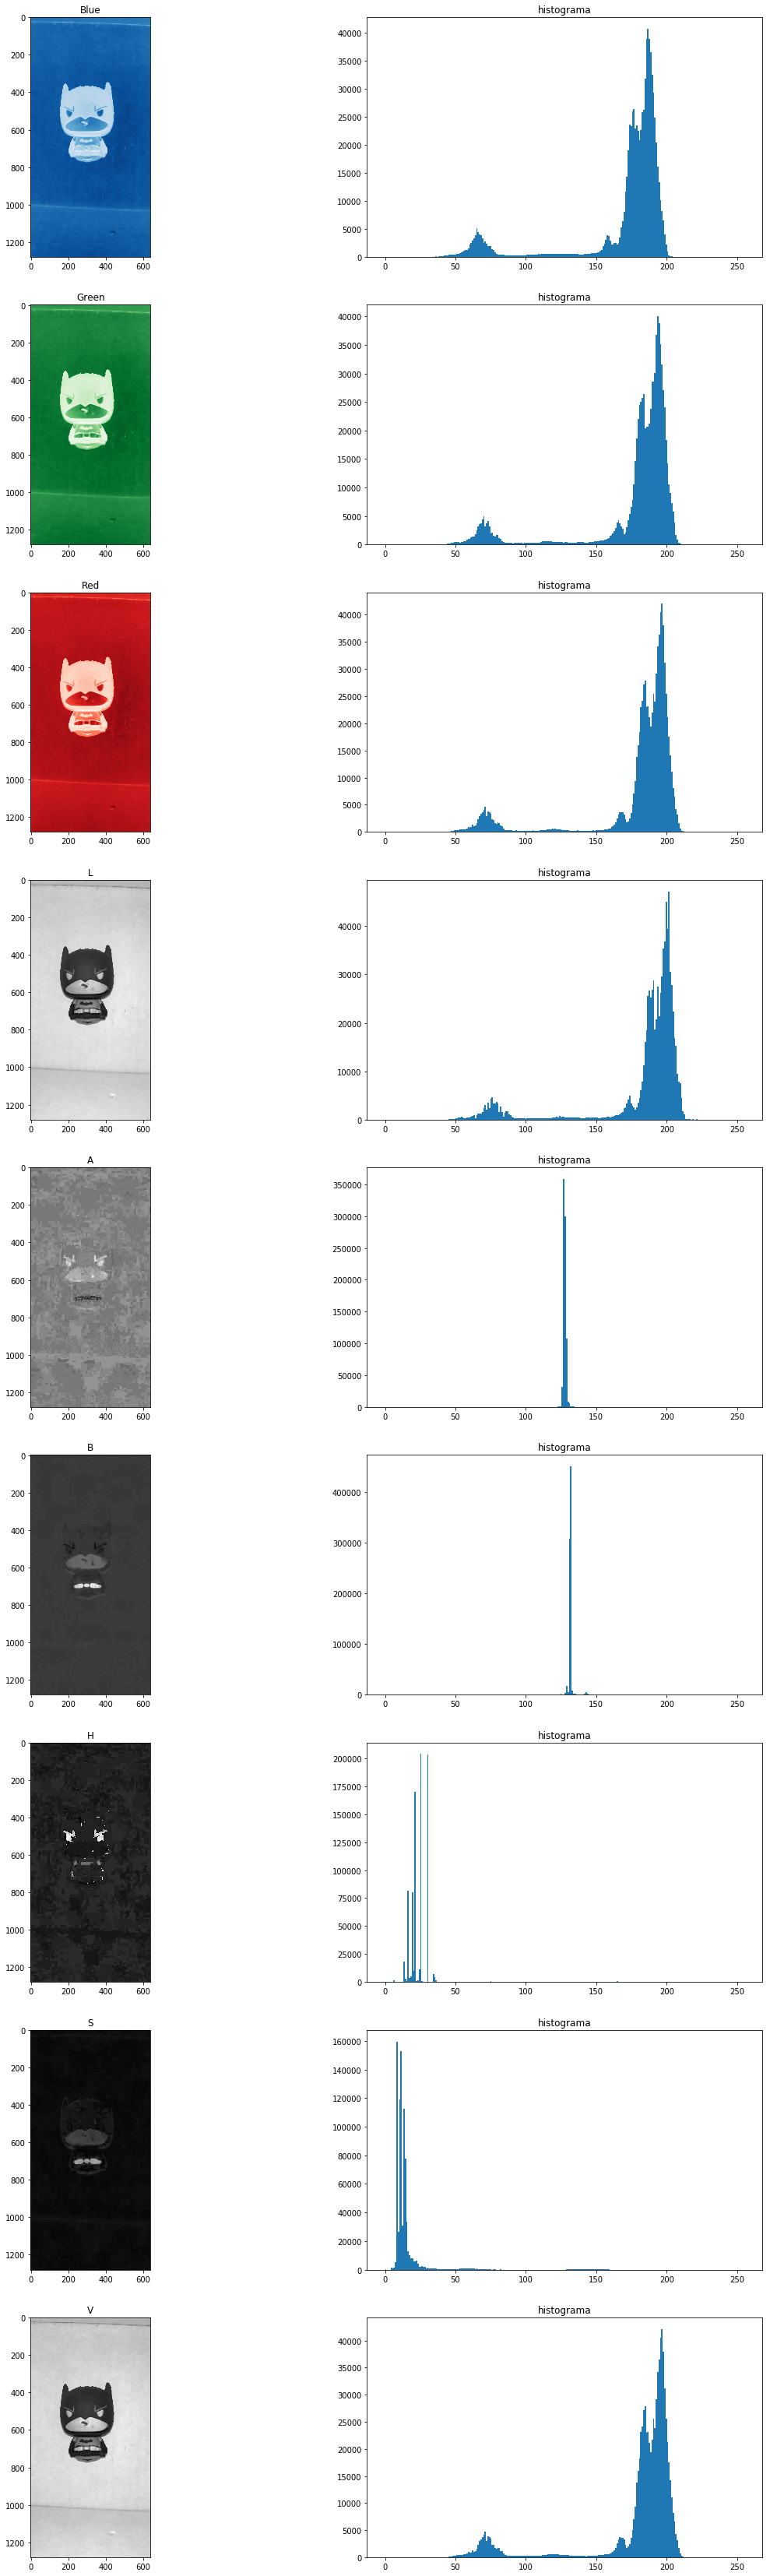

In [20]:
ally(img_bat1)


<h3>Análisis</h3>

Para esta imagen los canales RGB, el canal L y el canal V del LAB y HSV respectivamente, tienen histogramas bastantes similares, el canal L representa la luminosidad y el canal V el valor, el canal V principalmente en tonalidad de grises, va desde el negro (siendo 0 el negro absoluto) hasta el blanco.

Para esta imagen se aprecia de mejor manera la figura usando el canal L, ya que en el histograma de este existen pocas frecuencias bajas.

<h3>Para la imagen 2 </h3>

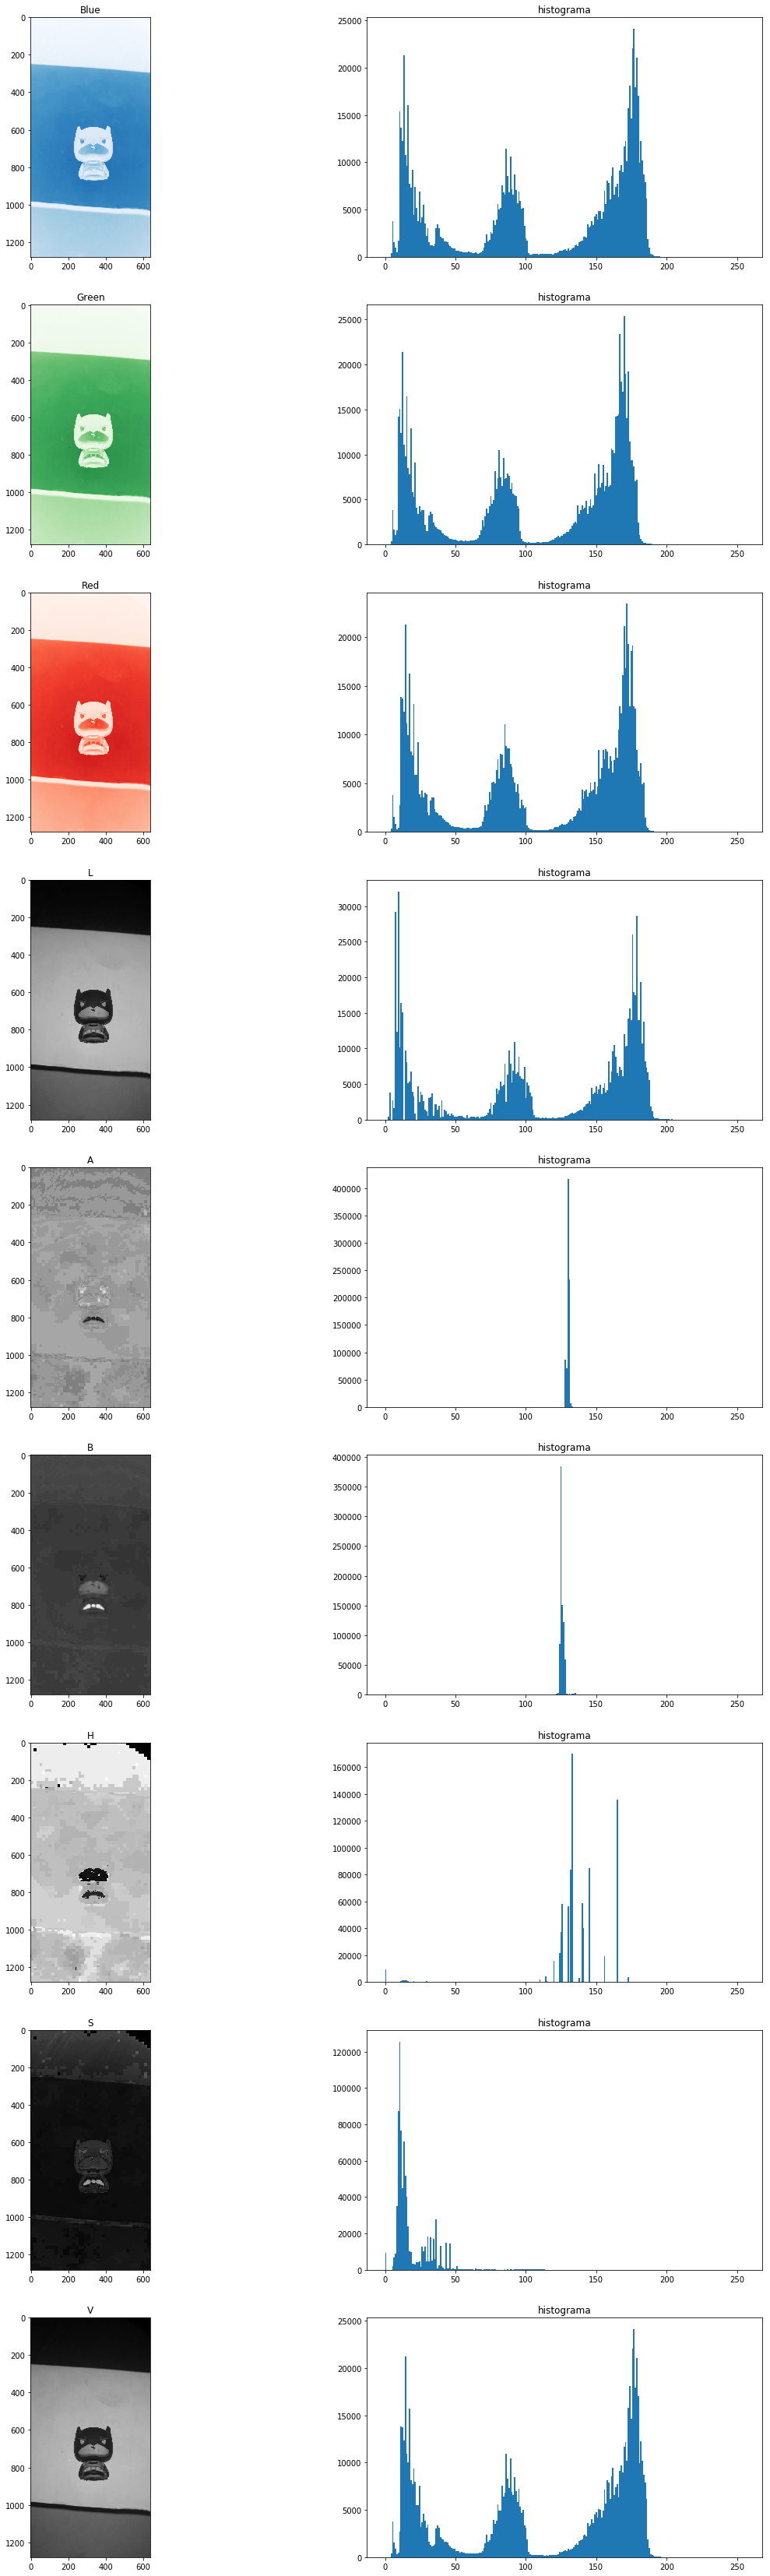

In [21]:
ally(img_bat2)

<h3>Análisis</h3>

<p>Semejante a la imagen 1, podemos observar que los histogramas de RGB L y V son bastante similares, diferenciamos esta vez al canal rojo como la mejor opción entre RGB ya que permite la mejor distinción entre las distintas partes de la figura, en este caso es más fácil identificar el tronco y boca de Batman que en los canales B y G, respecto a los canales L y V, el canal V presenta menos frecuencias bajas, esto se puede ver en el histograma ya que se reparten estas frecuencias en valores intermedios un poco más que en el canal L, en la imagen se puede observar una tonalidad de grises de menos contraste que en el canal L</p>

<p>
    Para esta imagen se aprecia de mejor manera la silueta de la imagen en el canal R.
</p>

<h3>Para la imagen 3</h3>

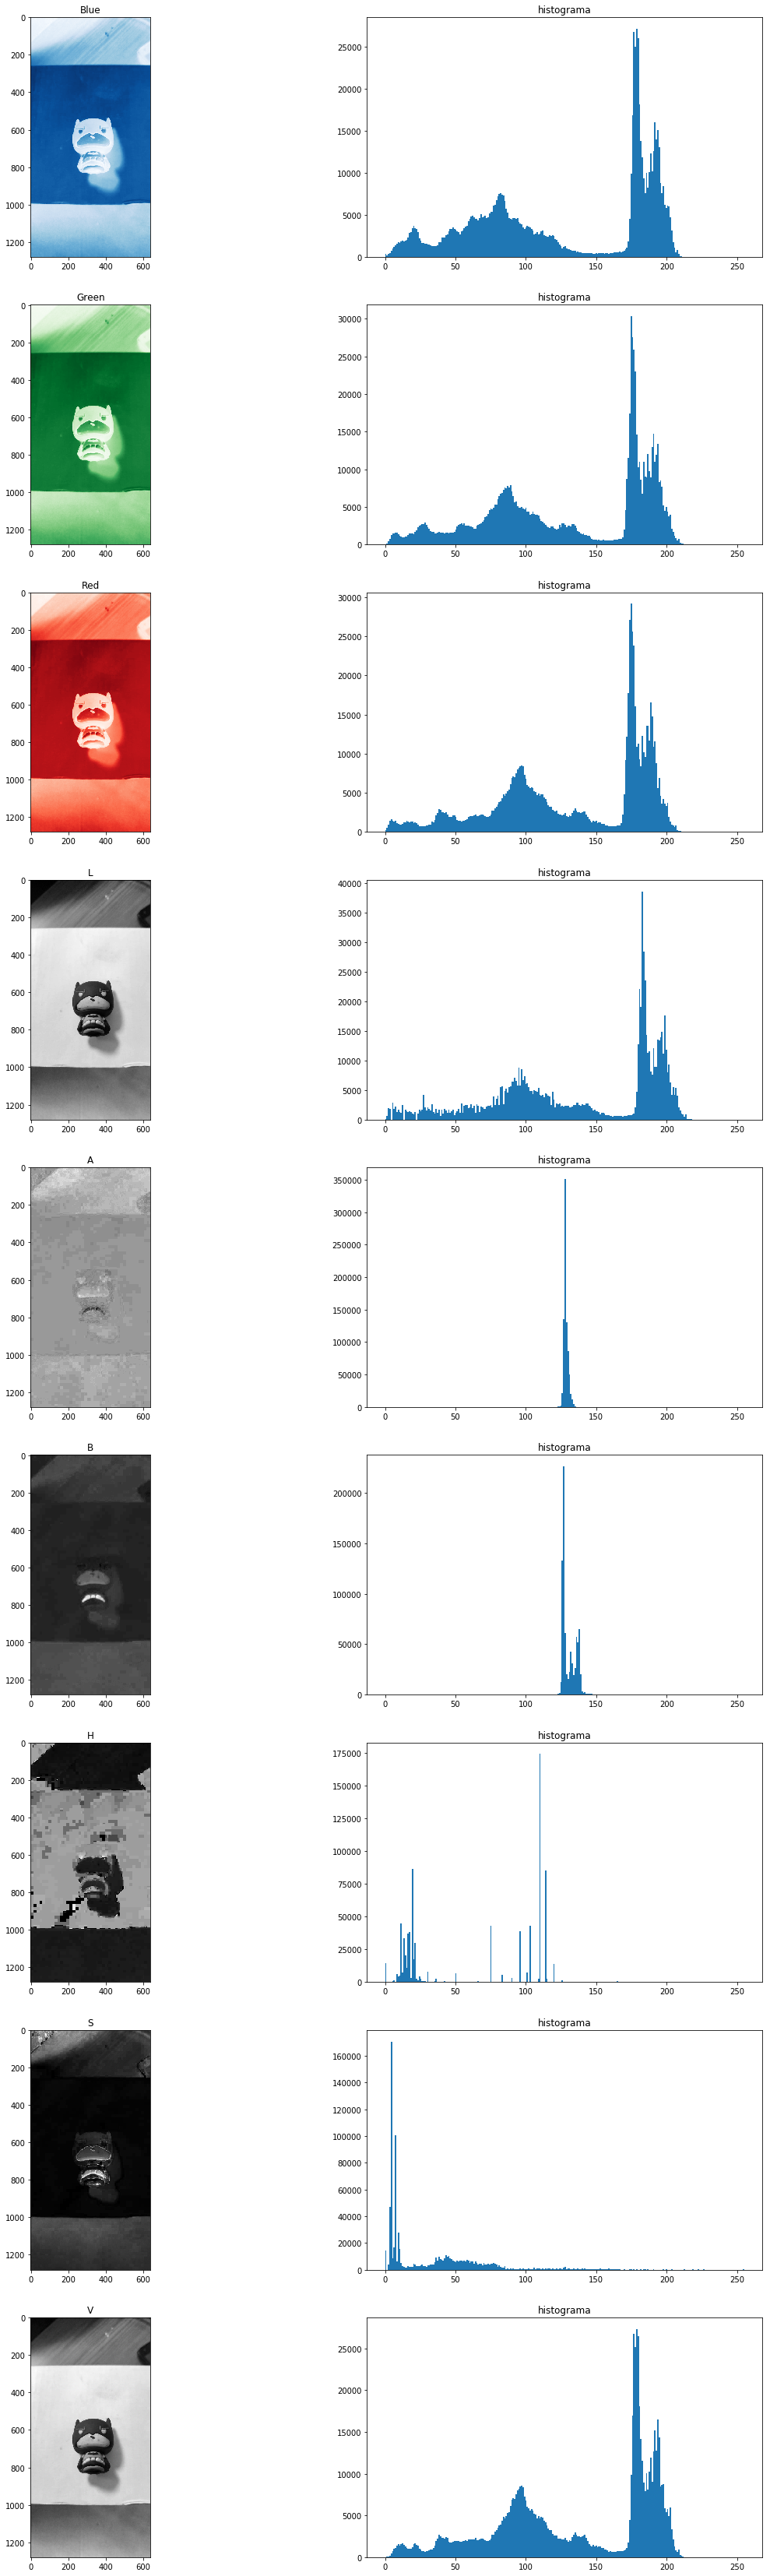

In [22]:
ally(img_bat3)

<h3>Análisis</h3>

En esta imagen si se puede apreciar más el problema de sombras.

Al igual que en las imágenes anteriores se descartan los canales A,B del lab y H,S del hsv.

En este caso podemos apreciar que los canales RGB la sombra de la figura se llega a confundir incluso con la silueta de la misma. Por otro lado en el canal L existe una mejor distinción de la silueta de la figura con la sombra, esto se ve reflejado en el histograma ya que las frecuencias bajas son menores que en histogramas de canales RGB y V, V es una buena aproximación también pero al igual que la imagen anterior el histograma tiene más frecuencias bajas y esparcidas por el rango de valores, dando así poco contraste en grises.

<p>
    Para esta imagen se aprecia de mejor manera la silueta de la imagen en el canal L.
</p>

<font size = 6 color = blue><b><center> MÓDULO II </center></b></font>

# El objetivo de este módulo es entender y aplicar los conceptos de modificación del histograma, su manipulación y las transformaciones básicas de una imagen y entre imágenes.

# 1)
# a)


Text(0.5, 1.0, 'Imagen 2 (jap.png)')

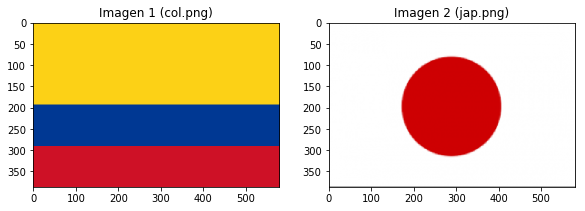

In [12]:
#Modulo 2 a)
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Leer las imágenes, hacerlas del mismo tamaño para poderlas sumar
img1 = cv2.cvtColor(cv2.imread('res/col.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/jap.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

#Operación suma de las dos imágenes
res = cv2.add(img1,img2)

#Crear una figura 1x3 para plotear las imágenes de entrada 
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1 (col.png)")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2 (jap.png)")


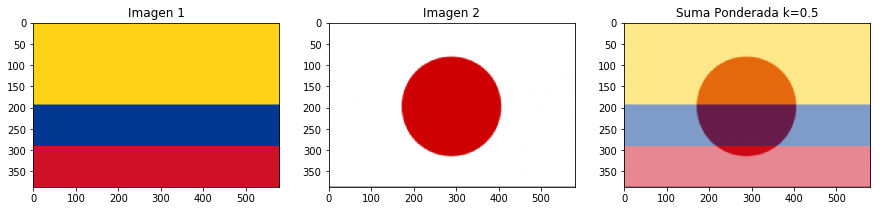

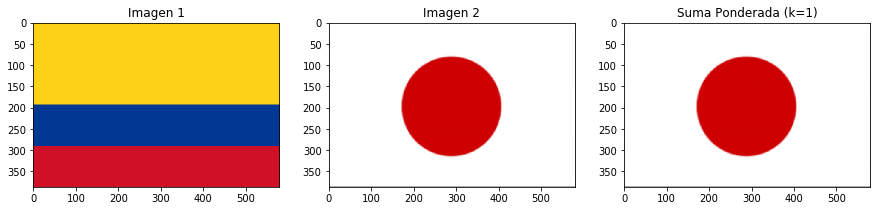

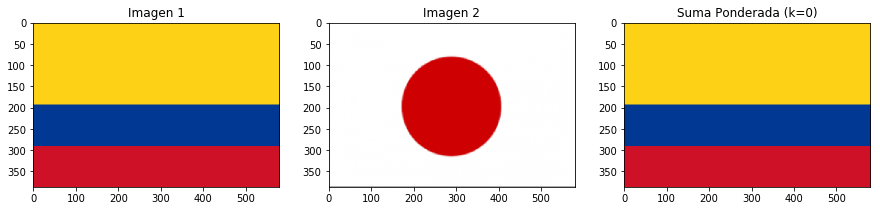

In [13]:
#Indicamos el parámetro a que indica la importancia de cada imagen
k= 0.5

#Mediante la T.Lineal, si a=1, tenemos la imagen 1 únicamente. Si a=0, obtenemos solo img2.
# Si 0<a<1 tendremos combinaciones ponderadas de las imágenes entrada
res = cv2.add((1-k)*img1,k*img2).astype(np.uint8)

#Crear una figura 1x3 para mostrar las imágenes de entrada y la combinación ponderada
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Suma Ponderada k=0.5");
#con K=0
k=1

res = cv2.add((1-k)*img1,k*img2).astype(np.uint8)
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Suma Ponderada (k=1)");

#K = 0
k=0

res = cv2.add((1-k)*img1,k*img2).astype(np.uint8)
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(res,cmap='gray')
plt.title("Suma Ponderada (k=0)");

#como se puede apreciar el valor de K le da la "importancia" a cada imagen al momento de sumarlas
#Cuando K es menor que 0.5 se le da mas importancia a col.png y en caso contrario se le da mas a jap.png
#En los extremos (K=0 ó K=1) se contraresta una de las dos imagenes debido a la formula ((1-K)*img1,K*img2).

# b)

Text(0.5, 1.0, 'Transformación para a = 50 y b = 200')

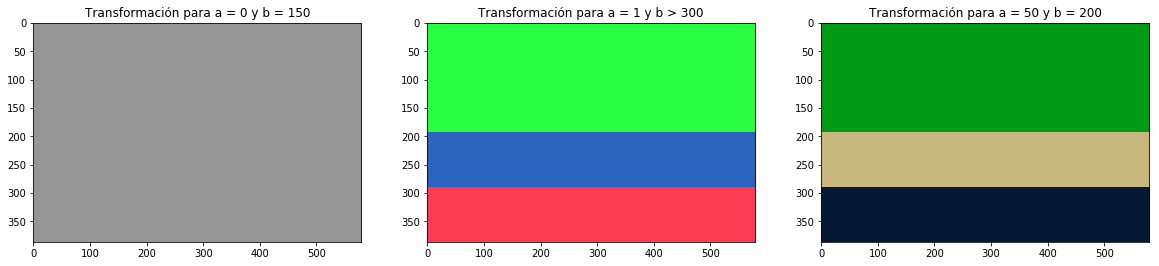

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#creamos una funcion para realizar la transformación a la imagen

def f1(a,b,i1):
  return a*i1+b

#leemos la imagen

img_c = cv2.imread("res/col.png",cv2.IMREAD_COLOR)

#Cambio a RGB

img_ = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

#Creamos copias de la imagen para mostrar en paralelo las otras tranformaciones

img_v1 = np.copy(img_)
img_v2 = np.copy(img_)
img_v3 = np.copy(img_)

#Valor para las constantes a y b

a1 = 0
b1 = 150

a2 = 1
b2 = 300

a3 = 50
b3 = 200

#Ciclo para aplicar la tranformacion a cada uno de los canales RGB

for i in range (3):
  img_v1[:,:,i]=f1(a1,b1,img_v1[:,:,i])

for i in range (3):
  img_v2[:,:,i]=f1(a2,b2,img_v2[:,:,i])

for i in range (3):
  img_v3[:,:,i]=f1(a3,b3,img_v3[:,:,i])
    
    
#Imagen con la transformacion aplicada

fig = plt.figure(figsize=(20,32))

plt.subplot(1,3,1)
plt.imshow(img_v1)
plt.title("Transformación para a = 0 y b = 150")

plt.subplot(1,3,2)
plt.imshow(img_v2)
plt.title("Transformación para a = 1 y b > 300")
    
plt.subplot(1,3,3)
plt.imshow(img_v3)
plt.title("Transformación para a = 50 y b = 200")

# 2)

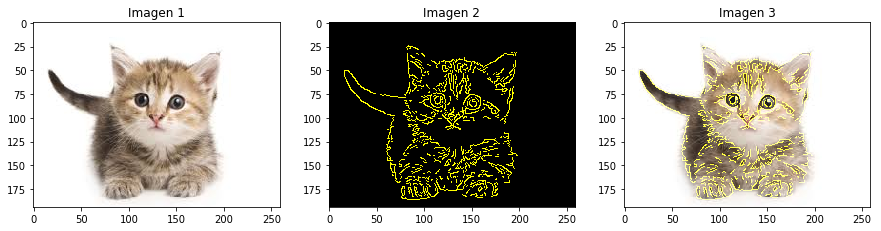

In [15]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Leer la imagen de entrada
img1 =cv2.cvtColor(cv2.imread('res/gato.jpg'), cv2.COLOR_BGR2RGB)

#Utilizamos la función cv2.Canny, que corresponde a un algoritmo de detección de bordes
#Al parecer esta funcion utiliza la derivada de la imagen para detectar los bordes
#es decir: si el cambio entre un grupo de pixeles y otro es muy brusco, es muy posible que entre esos grupos haya un borde
edges = cv2.Canny(img1,150,200)
#Resaltar los bordes de blanco si sus pixeles son menores que un valor umbral. La imagen originalmente
#sale con los pixles que no forman parte del borde en un color diferente de negro, se llevan a negro para
#
edges[edges<128] = 0
#Convertir la imagen edges a RGB
edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

edges[:,:,2]=0               #para obtener el color amarillo (255,255,0)

#Crear una figura 1x3 para mostrar la imagen de entrada, la imagen obtenida con edges y la superposición
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(edges,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(cv2.add(img1,edges),cmap='gray')
plt.title("Imagen 3");